This is an introduction to evolutionary computation in Python with NumPy.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [16]:
class Candidate:
    def __init__(self, value, fit):
        self.value = value
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere(value):
    return np.dot(value.T, value)

def crossover(parent1, parent2):
    return (parent1.value + parent2.value) / 2


In [17]:
n = 5
x = 2 * np.ones(n)

The first generation is: Mutation-Fitness: 46.60325277838914, Mutation-Fitness: 33.40487243605168, Mutation-Fitness: 13.814446561044933, Mutation-Fitness: 32.34784053366003, Mutation-Fitness: 11.676142365110163, Mutation-Fitness: 20.33259987007451, Mutation-Fitness: 35.16971540335277, Mutation-Fitness: 24.02736067683854, Mutation-Fitness: 16.31832266322934, Mutation-Fitness: 25.349855900281465, Mutation-Fitness: 25.79701485437014, Mutation-Fitness: 26.016988621981483, Mutation-Fitness: 12.9113933007159, Mutation-Fitness: 22.468547487553113, Mutation-Fitness: 22.16483485439487, Mutation-Fitness: 17.469118135786967, Mutation-Fitness: 16.54768915566526, Mutation-Fitness: 34.21147995628914, Mutation-Fitness: 21.63183987738558



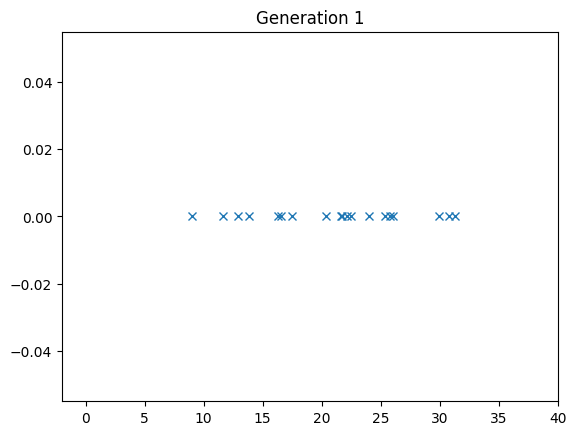

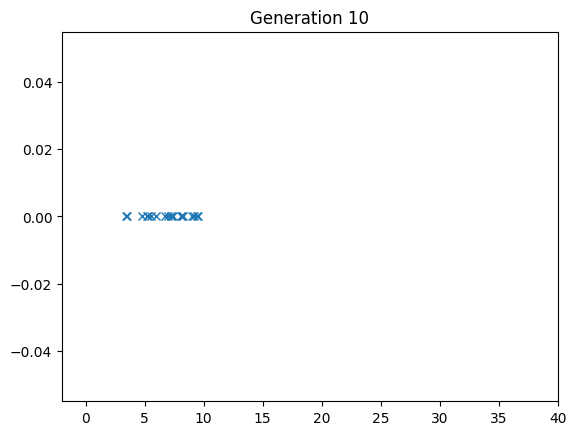

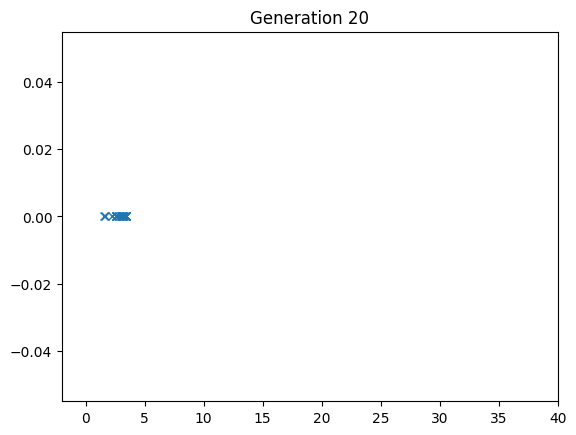

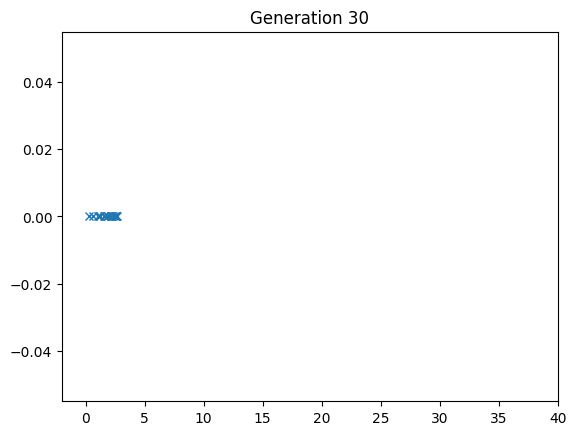

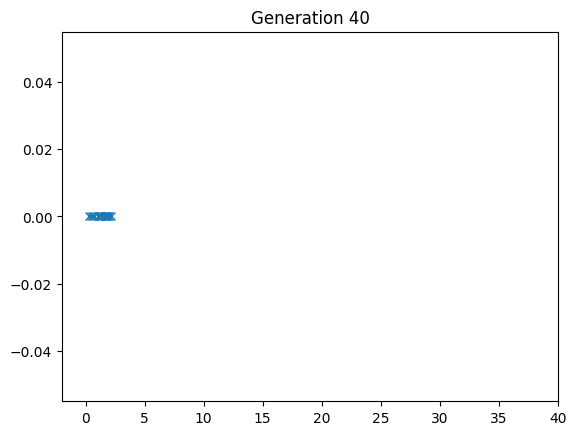

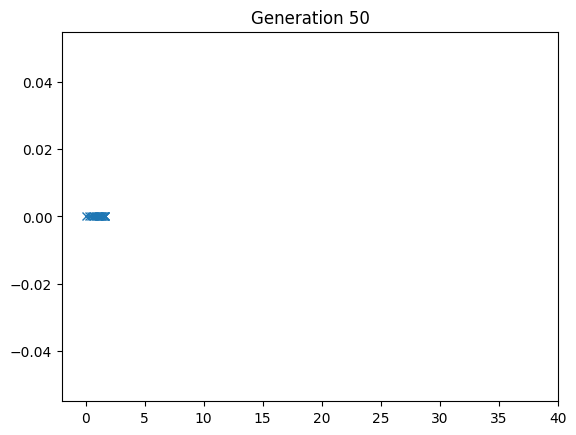

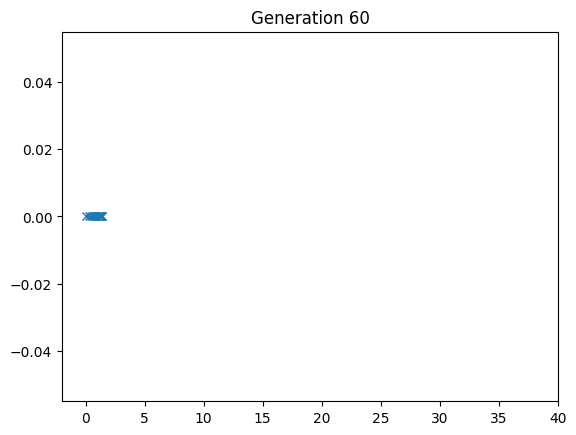

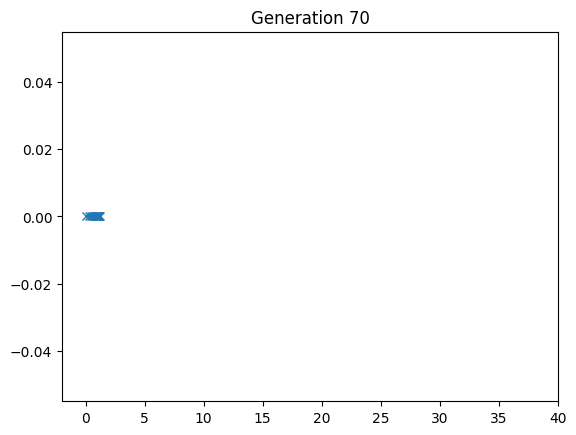

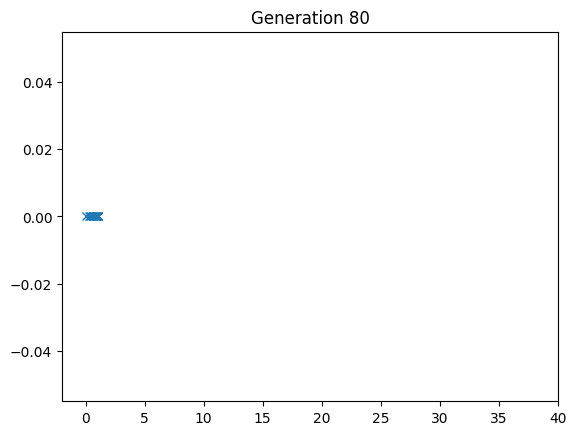

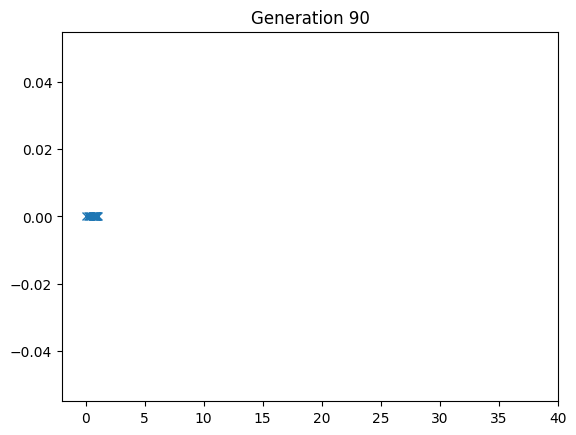

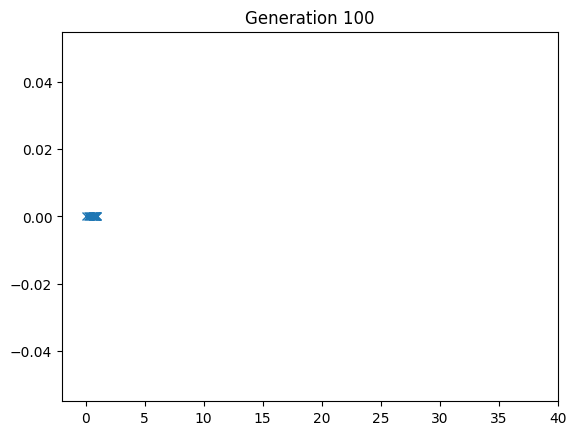

The last generation is: Mutation-Fitness: 0.05691381066847329, Mutation-Fitness: 0.18447819002440913, Mutation-Fitness: 0.2892155538267143, Mutation-Fitness: 0.3747772484838747, Mutation-Fitness: 0.4592287020102558, Mutation-Fitness: 0.5052391662234371, Mutation-Fitness: 0.615414895041196, Mutation-Fitness: 0.6228953432579843, Mutation-Fitness: 0.6695907015360498, Mutation-Fitness: 0.7310043328239825, Mutation-Fitness: 0.7585182063492368, Mutation-Fitness: 0.7726298617594406, Mutation-Fitness: 0.8201956633206348, Mutation-Fitness: 0.8813912627249367, Mutation-Fitness: 0.8893976495493777, Mutation-Fitness: 0.8930957546056709, Mutation-Fitness: 0.9049936738823618, Mutation-Fitness: 0.9732296317987096, Mutation-Fitness: 0.9842465968725559


In [18]:
generation = 1
sigma = 1.0
parents_mue = 20
mutations_lambda = 10
population = []

# Generate initial mue parents for population
for i in range(1, parents_mue):
    x_ = x + sigma * np.random.randn(n)
    fitness = sphere(x_)

    candidate = Candidate(x_, fitness)
    population.append(candidate)
print("The first generation is:", ", ".join([str(m) for m in population]))
print()

# Compute 100 generations
while generation <= 100:
    # Crossover with 2 parents (p=2) and intermediate recombination by mean value (repeat for lambda number of mutations)
    for i in range(1, mutations_lambda):
        first_parent = rdm.randrange(len(population))
        second_parent = rdm.randrange(len(population))
        mean_value = crossover(population[first_parent], population[second_parent])
        # Mutation
        mean_value_ = mean_value + sigma * np.random.randn(n)
        fitness_ = sphere(mean_value_)

        candidate = Candidate(mean_value_, fitness_)
        population.append(candidate)

    # TODO: Try to implement Rechenberg with a 5-step generation window (larger than 1/5 with s/gen-window)
    # TODO: Reset the success counter to empty after 5 steps to do it again

    # Now select the best (minimal) mue parents/mutations out of complete population (parent + mutations)
    population.sort()
    population = population[:parents_mue - 1]

    # Show actual distribution of fitness among population
    if generation == 1 or generation % 10 == 0:
        plt.plot([p.fit for p in population], np.zeros_like(population), 'x')
        plt.xlim(-2, 40)
        plt.title('Generation ' + str(generation))
        plt.show()

    generation += 1

# Return the last generation
print("The last generation is:", ", ".join([str(m) for m in population]))